In [121]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
pd.set_option('display.max_columns', 100)

In [122]:
df = pd.read_excel('Лист Microsoft Excel.xlsx')
df

,Ключ проблемы,Идентификатор проблемы,Идентификатор родителя,Статус,Создано,Обновленo,Исполнитель,Пользовательское поле (Story Points),Тема,Столбец1,Создатель,Пользовательское поле (First sprint start date),Дата решения,Пользовательское поле (Epic Link),Спринт,Спринт_1,Спринт_2,Спринт_3,Спринт_4,Спринт_5,Спринт_6,Спринт_7,Спринт_8,Спринт_9,Спринт_10,Спринт_11,Спринт_12,Спринт_13,Спринт_14,Спринт_15
0,ANL-3003,333036,NaN,В работе,2024-11-07 10:37:00,2024-11-07 10:38:00,flerinvs,3.0,Задачи BI и Продукта,NaN,flerinvs,NaT,NaT,ANL-2239,BI sprint 41 04.11-10.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANL-3002,332967,NaN,Backlog,2024-11-06 18:14:00,2024-11-06 18:14:00,mikhaelyanta,NaN,Добавление сделок СБР в SLT,NaN,flerinvs,NaT,NaT,ANL-2271,to do_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANL-2999,332823,NaN,Готово,2024-11-06 12:52:00,2024-11-07 10:34:00,flerinvs,1.0,Хантфлоу посмотреть кандидатов,NaN,flerinvs,NaT,2024-11-06 15:58:00,ANL-2239,BI sprint 41 04.11-10.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANL-3000,332931,NaN,В работе,2024-11-06 16:45:00,2024-11-06 16:45:00,furletovaav,3.0,Шаблон на сильвер по ООН,NaN,furletovaav,NaT,NaT,ANL-2281,BI sprint 41 04.11-10.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANL-2862,322945,NaN,Готово,2024-09-19 14:24:00,2024-11-07 10:34:00,flerinvs,2.0,Процессы BI,NaN,flerinvs,2024-09-23,2024-11-07 10:34:00,ANL-2239,BI sprint 41 04.11-10.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,ANL-5,21592,NaN,Сделать,2020-02-17 18:06:00,2023-12-07 15:17:00,NaN,NaN,"Отчетность по продукту ""Ремонт""",NaN,potapovvs,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909,ANL-4,21591,NaN,Сделать,2020-02-17 18:05:00,2023-12-07 15:17:00,NaN,NaN,"Отчетность по продукту ""ИБ""",NaN,potapovvs,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2910,ANL-3,21589,NaN,Закрыт,2020-02-17 17:48:00,2022-09-09 18:01:00,NaN,NaN,тест,NaN,potapovvs,NaT,2022-09-09 18:01:00,ANL-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2911,ANL-2,21588,NaN,Закрыт,2020-02-17 17:47:00,2020-02-17 18:04:00,NaN,NaN,Версия 0.1,NaN,potapovvs,NaT,2020-02-17 18:04:00,ANL-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df['Month'] = df['Обновленo'].dt.to_period('M').dt.to_timestamp().dt.date


C:\Users\flerinvs\AppData\Local\Temp\ipykernel_38920\2014223270.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Распределение задач ЭР/СБР')

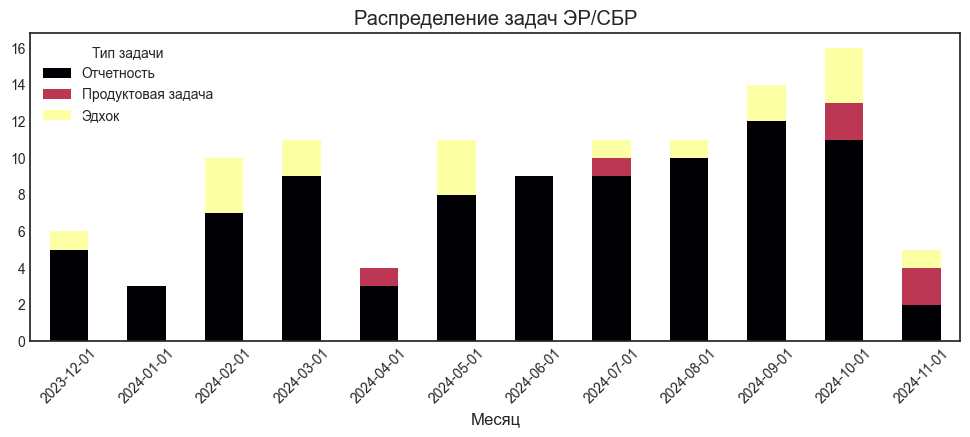

In [124]:
plt.style.use('seaborn-white')
res = df.groupby(['Month', 'Столбец1'], as_index = False).agg({"Ключ проблемы":"count"}).rename(columns = {"Столбец1":"Тип задачи", "Month" :"Месяц"})
res.pivot_table(index='Месяц', columns='Тип задачи', values = 'Ключ проблемы').plot(kind = 'bar', stacked=True, figsize = (12, 4), cmap='inferno')
plt.tick_params(axis='x', rotation=45)
plt.title('Распределение задач ЭР/СБР')